<img src="../media/KNTU.png"  width="250">

# Emotion Detection With Machine Learning - Model Training and Real Time Emotion Detection Using KNN, SVM, RF, VggNet, CNN Algorithms
##### Algorithmic Graph Theory by Dr. Sheikhi 4022
###### Fatemeh Razaqnejad 9822123 - Baran Babaei 9931893 - Alireza DolatAbadi 9821853

Download Dataset: https://drive.google.com/file/d/1tedoFTFFBbM2iUvdg37WQFSq07ghYrll/view?usp=drive_link

### Steps to follow
1. Adding Libraries
2. Loading dataset
3. Apply PCA and save PCA data
4. Train with SVM, RF, CNN, VggNet and KNN algorithm and save model data
5. Load Model
6. Get reports
7. Save output of test predicts
8. Reload model and map emotions
9. Real-Time face recognition
10. Real-Time recognition with adding emoji on face

### Add Libraries

In [1]:
import os
import numpy as np
import cv2
import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


### Load Data

We already splited the dataset into test and train in the "Data Validation" phase, so we just need to load the images into arrays az input out put. in this part **x** is reffering to image files and **y** is reffering to labels.

In [8]:
# Function to load images from a folder and flatten them
def load_images_from_folder(folder, label, size=(224, 224)):
    images = []
    labels = []
    original_images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        if img is not None:
            img_resized = cv2.resize(img, size)  # Resize the image
            original_images.append(img_resized)  # Keep original image
            images.append(img_resized.flatten())  # Flatten image array and add to list
            labels.append(label)  # Assign label based on folder name
    return np.array(images), np.array(labels), original_images

# Load train images and labels
X_train = []
y_train = []
original_images_train = []

for label in range(7):
    train_data_folder = f'../data/dataset/train/{label}'
    images, labels, original_images = load_images_from_folder(train_data_folder, label)
    X_train.extend(images)
    y_train.extend(labels)
    original_images_train.extend(original_images)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Load test images and labels
X_test = []
y_test = []
original_images_test = []

for label in range(7):
    test_data_folder = f'../data/dataset/test/{label}'
    images, labels, original_images = load_images_from_folder(test_data_folder, label)
    X_test.extend(images)
    y_test.extend(labels)
    original_images_test.extend(original_images)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Print shapes for debugging
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Check if X_train and y_train are correctly populated
if len(X_train) == 0 or len(X_test) == 0:
    raise ValueError("X_train or X_test is empty. Check your data loading.")

Shape of X_train: (6961, 50176)
Shape of y_train: (6961,)
Shape of X_test: (1740, 50176)
Shape of y_test: (1740,)


##### load data for VggNet


In [87]:
# def load_images_from_folder(folder, label, size=(224, 224)):
#     images = []
#     labels = []
#     original_images = []
#     for filename in os.listdir(folder):
#         img_path = os.path.join(folder, filename)
#         img = cv2.imread(img_path)  # Load image in color (BGR)
#         if img is not None:
#             img_resized = cv2.resize(img, size)  # Resize the image
#             original_images.append(img_resized)  # Keep original image
#             images.append(img_resized)  # Add to list without flattening
#             labels.append(label)  # Assign label based on folder name
#     return np.array(images), np.array(labels), original_images

# # Adjust the rest of the data loading process accordingly
# # Load train images and labels
# X_train = []
# y_train = []
# original_images_train = []

# for label in range(7):
#     train_data_folder = f'../data/dataset/train/{label}'
#     images, labels, original_images = load_images_from_folder(train_data_folder, label)
#     X_train.extend(images)
#     y_train.extend(labels)
#     original_images_train.extend(original_images)

# X_train = np.array(X_train)
# y_train = np.array(y_train)

# # Load test images and labels
# X_test = []
# y_test = []
# original_images_test = []

# for label in range(7):
#     test_data_folder = f'../data/dataset/test/{label}'
#     images, labels, original_images = load_images_from_folder(test_data_folder, label)
#     X_test.extend(images)
#     y_test.extend(labels)
#     original_images_test.extend(original_images)

# X_test = np.array(X_test)
# y_test = np.array(y_test)

# # Normalize the data
# X_train = X_train / 255.0
# X_test = X_test / 255.0

# # Convert labels to categorical one-hot encoding
# y_train_categorical = to_categorical(y_train, num_classes=7)
# y_test_categorical = to_categorical(y_test, num_classes=7)

# # Print shapes for debugging
# print(f"Shape of X_train: {X_train.shape}")
# print(f"Shape of y_train: {y_train.shape}")
# print(f"Shape of X_test: {X_test.shape}")
# print(f"Shape of y_test: {y_test.shape}")


### Apply PCA and Save

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms a large set of variables into a smaller one that still contains most of the information in the large set. PCA works by identifying the directions (principal components) along which the variance of the data is maximized. By projecting the data onto these principal components, we can reduce the number of features while preserving as much variability as possible. This is particularly useful in machine learning to enhance computational efficiency and reduce the risk of overfitting, especially when dealing with high-dimensional data.

In this section of the project, we first standardized the data using StandardScaler. Standardization is a crucial step in PCA as it ensures that each feature contributes equally to the result. Without standardization, features with larger ranges would dominate the principal components, skewing the results. We applied the fit_transform method on the training data and the transform method on the test data to ensure consistent scaling.

Next, we applied PCA to reduce the dimensionality of our dataset. We chose to keep 100 principal components, a number that balances between retaining variance and reducing complexity. The explained variance ratio was computed to understand how much information each principal component captures. By plotting the cumulative explained variance, we visualized the proportion of the dataset's variance captured as we include more principal components. Finally, we saved the fitted scaler and PCA models using joblib, ensuring that our data preprocessing steps could be consistently applied during model training and future predictions.

Explained variance ratio: [0.27403079 0.12019909 0.09316748 0.04646483 0.03506966 0.02675164
 0.02230124 0.01689225 0.01561983 0.01328226 0.01307359 0.01126549
 0.0098579  0.00964006 0.00870928 0.00824669 0.00655508 0.00619306
 0.00588233 0.00551681 0.00547474 0.00521007 0.00507774 0.00494885
 0.0046348  0.00454777 0.00435411 0.00407263 0.00383569 0.00374333
 0.00352009 0.00329079 0.00295911 0.00290139 0.00282498 0.00274852
 0.00268985 0.00265056 0.00260657 0.00244609 0.00239811 0.00233792
 0.00223745 0.00218103 0.00216574 0.00213408 0.00210489 0.00201707
 0.00187595 0.00185702 0.00180846 0.00179303 0.00173922 0.0016808
 0.00162788 0.00158003 0.00156786 0.00154824 0.00152359 0.00148544
 0.00143356 0.0014021  0.00138181 0.00136175 0.00133193 0.00128856
 0.00124653 0.00123872 0.00121727 0.00119206 0.00117721 0.00116239
 0.00114791 0.0011198  0.00110514 0.00107607 0.00105335 0.00102992
 0.00101335 0.00099982 0.00098192 0.000972   0.0009424  0.00093511
 0.00090955 0.00090806 0.00088623 0.0

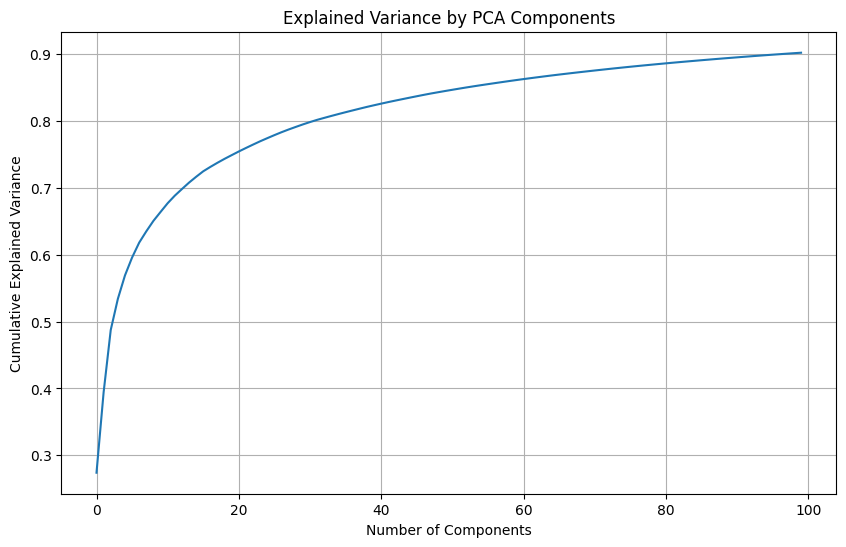

Scaler saved to scaler.pkl
PCA saved to pca.pkl


In [88]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of principal components to keep
n_components = 100  # You can adjust this number based on your dataset and computational resources

# Apply PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

# Optionally, you can plot the explained variance to decide on the number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Save the scaler and PCA models to files
scaler_filename = 'scaler.pkl'
pca_filename = 'pca.pkl'
joblib.dump(scaler, scaler_filename)
joblib.dump(pca, pca_filename)
print(f"Scaler saved to {scaler_filename}")
print(f"PCA saved to {pca_filename}")

##### Apply PCA for VggNet

In [89]:
# # Define the batch size
# batch_size = 100  # Reduce batch size to decrease memory usage

# # Initialize the scaler and PCA
# scaler = StandardScaler()
# pca = IncrementalPCA(n_components=100)  # Adjust n_components based on your needs

# # Process the data in batches
# def process_in_batches(data, transformer, batch_size, fit=True):
#     result = []
#     for i in range(0, data.shape[0], batch_size):
#         batch = data[i:i + batch_size]
#         if fit:
#             transformer.partial_fit(batch)
#         transformed_batch = transformer.transform(batch)
#         result.append(transformed_batch)
#     return np.vstack(result)

# # Fit the scaler and PCA incrementally
# for i in range(0, X_train.shape[0], batch_size):
#     scaler.partial_fit(X_train[i:i + batch_size])
# for i in range(0, X_train.shape[0], batch_size):
#     pca.partial_fit(scaler.transform(X_train[i:i + batch_size]))

# # Transform the data incrementally
# X_train_scaled = np.vstack([scaler.transform(X_train[i:i + batch_size]) for i in range(0, X_train.shape[0], batch_size)])
# X_train_pca = np.vstack([pca.transform(X_train_scaled[i:i + batch_size]) for i in range(0, X_train_scaled.shape[0], batch_size)])
# X_test_scaled = np.vstack([scaler.transform(X_test[i:i + batch_size]) for i in range(0, X_test.shape[0], batch_size)])
# X_test_pca = np.vstack([pca.transform(X_test_scaled[i:i + batch_size]) for i in range(0, X_test_scaled.shape[0], batch_size)])

# # Explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# print(f"Explained variance ratio: {explained_variance_ratio}")

# # Optionally, you can plot the explained variance to decide on the number of components
# plt.figure(figsize=(10, 6))
# plt.plot(np.cumsum(explained_variance_ratio))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by PCA Components')
# plt.grid(True)
# plt.show()

# # Save the scaler and PCA models to files
# scaler_filename = 'scaler.pkl'
# pca_filename = 'pca.pkl'
# joblib.dump(scaler, scaler_filename)
# joblib.dump(pca, pca_filename)
# print(f"Scaler saved to {scaler_filename}")
# print(f"PCA saved to {pca_filename}")


### Model Training and Save

#### Why We Chose Random Forest?

We trained three different models to compare their performance:

1. **Random Forest**: A robust ensemble method that combines multiple decision trees to improve classification accuracy.
2. **KNN (K-Nearest Neighbors)**: A simple, instance-based learning algorithm that classifies data points based on their distance to the nearest training examples.
3. **CNN (Convolutional Neural Network)**: A deep learning model particularly well-suited for image data, as it can capture spatial hierarchies through convolutional layers.

Based on the evaluation metrics, we decided to use the Random Forest model for further analysis. The reasons for this decision include:

1. **Robustness**: Random Forest is less likely to overfit compared to individual decision trees.
2. **Accuracy**: As shown in the evaluation results, the Random Forest model achieved a significantly higher accuracy and F1-score compared to KNN and CNN.
3. **Interpretability**: Random Forest models provide insights into feature importance, which can be valuable for understanding the model's decision-making process.

The Random Forest model outperformed the other models in terms of precision, recall, and F1-score across most emotion classes, making it the most suitable choice for our emotion detection task.

<div style="display: flex; align-items: flex-start;">
    <div style="margin-right: 20px;">
        <strong>Random Forest</strong>
        <br>
        <img src="../media/RF_report.png" width="350">
    </div>
    <div style="margin-right: 20px;">
        <strong>KNN</strong>
        <br>
        <img src="../media/KNN_report.png" width="350">
    </div>
    <div>
        <strong>CNN</strong>
        <br>
        <img src="../media/CNN_report.png" width="350">
    </div>
</div>

#### Random Forest Model Training

In this section, we train a Random Forest model for emotion detection using facial images. The following steps outline the process of training, predicting, and evaluating the Random Forest model.
The Random Forest model is chosen for its robustness and high performance in our classification task, as indicated by its superior evaluation metrics compared to other models.

In [90]:
#### Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_pca, y_train)

# Predict labels for test data
y_pred = model.predict(X_test_pca)

# Evaluate performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save the trained model to a file
model_filename = 'RF_trained_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Display results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n {conf_matrix}')


Model saved to RF_trained_model.pkl
Accuracy: 0.5005747126436781
Confusion Matrix:
 [[ 41   0   4 130   1   0  57]
 [  0  13   0  15   0   1   4]
 [  5   0  41  95   2  11  36]
 [  3   0   2 492   1   3  34]
 [  7   0   3  97  16   3  60]
 [  0   0   3  54   0  98  25]
 [  5   0   2 199   4   3 170]]


### Other Algorithms (backup)

#### VggNet

In [91]:
# def build_vgg_model(input_shape=(224, 224, 3), num_classes=7):
#     model = Sequential([
#         Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D((2, 2), strides=(2, 2)),
        
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D((2, 2), strides=(2, 2)),
        
#         Conv2D(256, (3, 3), activation='relu', padding='same'),
#         Conv2D(256, (3, 3), activation='relu', padding='same'),
#         Conv2D(256, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D((2, 2), strides=(2, 2)),
        
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D((2, 2), strides=(2, 2)),
        
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         Conv2D(512, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D((2, 2), strides=(2, 2)),
        
#         Flatten(),
#         Dense(4096, activation='relu'),
#         Dense(4096, activation='relu'),
#         Dense(num_classes, activation='softmax')
#     ])
    
#     return model

# # Build the model
# model = build_vgg_model()
# model.summary()

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train_categorical, epochs=10, batch_size=64, validation_data=(X_test, y_test_categorical))

# # Evaluate the model
# score = model.evaluate(X_test, y_test_categorical, verbose=0)
# print(f"Test loss: {score[0]}")
# print(f"Test accuracy: {score[1]}")

# # Save the model
# model.save('vgg_emotion_detection_model.h5')
# print("VGGNet model saved.")

#### SVM

In [92]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for SVM
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['linear', 'rbf']
# }

# # Initialize Grid Search with cross-validation
# grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# # Fit Grid Search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# print(f"Best Parameters: {best_params}")
# print(f"Best Estimator: {best_estimator}")

# # Predict with the best estimator
# y_pred_svm = best_estimator.predict(X_test)

# # Evaluate performance using various metrics for the best estimator
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# # Save the trained SVM model to a file
# svm_model_filename = 'svm_trained_model.pkl'
# joblib.dump(best_estimator, svm_model_filename)
# print(f"SVM Model saved to {svm_model_filename}")

# # Display results for the best estimator
# print(f'SVM Accuracy: {accuracy_svm}')
# print(f'SVM Confusion Matrix:\n {conf_matrix_svm}')

#### KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict labels for test data using KNN
y_pred = knn_model.predict(X_test)

# Evaluate performance using various metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred)
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Save the trained KNN model to a file
knn_model_filename = 'KNN_trained_model.pkl'
joblib.dump(knn_model, knn_model_filename)
print(f"KNN Model saved to {knn_model_filename}")

# Display results for KNN
print(f'KNN Accuracy: {accuracy_knn}')
print(f'KNN Confusion Matrix:\n {conf_matrix_knn}')

KNN Model saved to KNN_trained_model.pkl
KNN Accuracy: 0.39482758620689656
KNN Confusion Matrix:
 [[ 65   7  21  67  11   8  54]
 [  3  14   3   4   4   1   4]
 [ 21   4  55  46   7  18  39]
 [ 46  10  27 301  23  15 113]
 [ 27   6  15  56  24   5  53]
 [ 11   5  25  53   6  61  19]
 [ 38   5  27 116  20  10 167]]


#### CNN

In [94]:
# Check the shape of a single image
image_shape = int(np.sqrt(X_train.shape[1]))
print(f"Image shape: {image_shape}x{image_shape}")

# Reshape the data to fit the model
X_train_reshaped = X_train.reshape(X_train.shape[0], image_shape, image_shape, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], image_shape, image_shape, 1)

# Normalize the data
X_train_reshaped = X_train_reshaped / 255.0
X_test_reshaped = X_test_reshaped / 255.0

# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train, num_classes=7)
y_test_categorical = to_categorical(y_test, num_classes=7)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_shape, image_shape, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(224, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train_categorical, validation_data=(X_test_reshaped, y_test_categorical), epochs=10, batch_size=64)

# Evaluate the model
score = model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

# Save the model to a file
model_filename = 'cnn_trained_model.h5'
model.save(model_filename)
print(f"CNN Model saved to {model_filename}")

# Save the scaler and PCA models to files for consistency
scaler_filename = 'scaler.pkl'
pca_filename = 'pca.pkl'
joblib.dump(scaler, scaler_filename)
joblib.dump(pca, pca_filename)
print(f"Scaler saved to {scaler_filename}")
print(f"PCA saved to {pca_filename}")


Image shape: 224x224
Epoch 1/10
109/109 [==============================] - 337s 3s/step - loss: 2.1950 - accuracy: 0.3139 - val_loss: 1.6145 - val_accuracy: 0.3908
Epoch 2/10
109/109 [==============================] - 383s 4s/step - loss: 1.4563 - accuracy: 0.4656 - val_loss: 1.4465 - val_accuracy: 0.4638
Epoch 3/10
109/109 [==============================] - 395s 4s/step - loss: 1.1617 - accuracy: 0.5730 - val_loss: 1.4125 - val_accuracy: 0.4862
Epoch 4/10
109/109 [==============================] - 394s 4s/step - loss: 0.8672 - accuracy: 0.6982 - val_loss: 1.4734 - val_accuracy: 0.5098
Epoch 5/10
109/109 [==============================] - 430s 4s/step - loss: 0.5704 - accuracy: 0.8102 - val_loss: 1.6969 - val_accuracy: 0.5103
Epoch 6/10
109/109 [==============================] - 424s 4s/step - loss: 0.3510 - accuracy: 0.8924 - val_loss: 1.9298 - val_accuracy: 0.5207
Epoch 7/10
109/109 [==============================] - 433s 4s/step - loss: 0.1938 - accuracy: 0.9496 - val_loss: 2.2145 -

c:\Users\razaq\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CNN Model saved to cnn_trained_model.h5
Scaler saved to scaler.pkl
PCA saved to pca.pkl


#### Loading Model

In [13]:
# Load the trained model from the file
model_filename = 'cnn_trained_model.h5'
model = load_model(model_filename)
print(f"Model loaded from {model_filename}")

# Use the loaded model for predictions
X_test_reshaped = np.reshape(X_test, (-1, 224, 224, 1))
y_pred = model.predict(X_test_reshaped)

# Evaluate performance using various metrics
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n {conf_matrix}')

Model loaded from cnn_trained_model.h5
55/55 [==============================] - 20s 358ms/step
Accuracy: 0.5
Confusion Matrix:
 [[ 93   1  16  38  28  15  42]
 [  2  14   3   4   2   2   6]
 [ 24   0  71  30  15  22  28]
 [ 45   0  27 350  28  21  64]
 [ 33   0  29  18  55  12  39]
 [  9   0  18   9   8 116  20]
 [ 51   0  30  70  44  17 171]]


### Getting Report

In this section, we evaluate the performance of our trained Random Forest model on the test data. We use several metrics to provide a comprehensive understanding of the model's effectiveness in classifying emotions. Here are the steps and explanations of the code used to generate the performance report:
The provided report shows the precision, recall, and F1-score for each class (0-6, representing different emotions) along with the overall accuracy, macro average, and weighted average. The Random Forest model's performance metrics indicate its ability to correctly classify emotions, and the weighted F1 score provides an overall performance measure.

   - **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It indicates how many selected items are relevant.
   - **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class. It indicates how many relevant items are selected.
   - **F1-score**: The weighted average of precision and recall. It provides a balance between precision and recall.
   - **Support**: The number of actual occurrences of the class in the dataset.

In [15]:
# Calculate precision, recall, F1-score, and support
report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", report)

# Calculate F1-score directly
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'Weighted F1 Score: {f1}')

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.40      0.38       233
           1       0.93      0.42      0.58        33
           2       0.37      0.37      0.37       190
           3       0.67      0.65      0.66       535
           4       0.31      0.30      0.30       186
           5       0.57      0.64      0.60       180
           6       0.46      0.45      0.45       383

    accuracy                           0.50      1740
   macro avg       0.52      0.46      0.48      1740
weighted avg       0.51      0.50      0.50      1740

Weighted F1 Score: 0.5009136612941564


### Save Output of Test Data

In this section, we save the predictions of our model on the test dataset. This process involves detecting faces in the test images, predicting the emotion, and saving the images with bounding boxes and labels indicating the detected emotion. Here's a brief explanation of what we did:

   - For each test image, we detect faces using the Haarcascade model.
   - For each detected face, we draw a bounding box around the face.
   - We predict the emotion of the face using our trained model.
   - We add a text label indicating the predicted emotion on the image.
   - The processed image is then saved in the output directory with the bounding box and emotion label.

By saving the processed test images with bounding boxes and emotion labels, we can visually inspect and verify the predictions made by our model. This step is crucial for evaluating the performance of our model in a real-world scenario, providing clear insights into how well the model performs on unseen data.

In [116]:
# Mapping of classes
class_mapping = {
    '0': 'Angry',
    '1': 'Disgust',
    '2': 'Fear',
    '3': 'Happy',
    '4': 'Sad',
    '5': 'Surprise',
    '6': 'Neutral'
}

# Load Haarcascade model for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
if face_cascade.empty():
    raise IOError("Haarcascade file not found or failed to load")

# Save predicted results with bounding boxes and class labels
output_folder = '../output/test_images'
os.makedirs(output_folder, exist_ok=True)

for i, (image, original_image) in enumerate(zip(X_test, original_images_train)):
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(original_image, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(original_image, (x, y), (x + w, y + h), (255, 0, 255), 2)

        # Add text label on top of the bounding box
        class_label = class_mapping[str(y_pred[i])]
        cv2.putText(original_image, class_label, (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)

    # Save the image with bounding box and label
    output_path = os.path.join(output_folder, f'image_{i}_{class_mapping[str(y_pred[i])]}.png')
    cv2.imwrite(output_path, original_image)

print("Results saved in directory:", output_folder)

Results saved in directory: ../output/test_images


### Extras

#### Reload Model

In this section, we load the previously saved model, scaler, and PCA components from their respective files to use them for real-time emotion detection.
By reloading the trained model, scaler, and PCA components, we can ensure that our real-time emotion detection system uses the same settings and transformations that were used during training, maintaining consistency and accuracy in predictions. This setup is essential for running the real-time face detection and emotion recognition with emojis.

In [2]:
# Load the trained model
model_filename = 'cnn_trained_model.h5'
model = load_model(model_filename)
print(f"Model loaded from {model_filename}")

# Mapping of emotions to emojis
class_mapping = {
    '0': 'Angry',
    '1': 'Disgust',
    '2': 'Fear',
    '3': 'Happy',
    '4': 'Sad',
    '5': 'Surprise',
    '6': 'Neutral'
}

# Load emoji images with alpha channel
emoji_mapping = {str(i): cv2.imread(f'../media/emojis/{i}.png', cv2.IMREAD_UNCHANGED) for i in range(7)}


Model loaded from cnn_trained_model.h5


#### Reload model for VggNet

In [99]:
# # Load the trained model from the file
# from keras.models import load_model


# # Use the loaded model for predictions
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)

# scaler_filename = 'scaler.pkl'
# pca_filename = 'pca.pkl'

# model = load_model('vgg_emotion_detection_model.h5')
# scaler = joblib.load(scaler_filename)
# pca = joblib.load(pca_filename)

# print(f"Model loaded from vgg_emotion_detection_model.h5")
# print(f"Scaler and PCA loaded from {scaler_filename} and {pca_filename}")

# # Mapping of emotions to emojis
# class_mapping = {
#     '0': 'Angry',
#     '1': 'Disgust',
#     '2': 'Fear',
#     '3': 'Happy',
#     '4': 'Sad',
#     '5': 'Surprise',
#     '6': 'Neutral'
# }

# # Load emoji images with alpha channel
# emoji_mapping = {str(i): cv2.imread(f'../media/emojis/{i}.png', cv2.IMREAD_UNCHANGED) for i in range(7)}

#### Real Time Recognition

In this section, we implemented real-time face detection using the Haar Cascade classifier from OpenCV.
This setup allows for real-time face detection using the webcam, providing a foundation for more advanced real-time applications like emotion recognition or face tracking.

In [100]:
# # Realtime face detection using Haar Cascade
# def realtime_face_detection():
#     face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#     if face_cascade.empty():
#         raise IOError("Haarcascade file not found or failed to load")
    
#     cap = cv2.VideoCapture(0)  # Open the default camera

#     while True:
#         ret, frame = cap.read()  # Capture frame-by-frame
#         if not ret:
#             break

#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=7)

#         for (x, y, w, h) in faces:
#             cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

#         cv2.imshow('Realtime Face Detection', frame)

#         # Exit the loop when 'q' is pressed
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     cap.release()
#     cv2.destroyAllWindows()

# # Run realtime face detection
# realtime_face_detection()

#### Real Time Recognition With Emoji

In this section, we implemented a real-time emotion recognition system that overlays emojis on detected faces based on the predicted emotion. Here’s a detailed explanation of the process:

1. **Resizing the Emoji Image**:
    - The emoji image is resized to fit the detected face region using `cv2.resize()`. This ensures the emoji aligns properly with the face's dimensions.

2. **Separating the Color Channels and Alpha Channel**:
    - If the emoji image has an alpha channel (indicating transparency), we separate the RGB color channels and the alpha channel. If not, we create a default alpha channel filled with ones, meaning no transparency.

3. **Creating Masks**:
    - A binary mask and its inverse are created from the alpha channel using `cv2.threshold()` and `cv2.bitwise_not()`. The binary mask helps in identifying the non-transparent regions of the emoji.

4. **Region of Interest (ROI)**:
    - We define the region of interest (ROI) in the original image where the emoji will be placed. This is done by selecting the region corresponding to the detected face.

5. **Applying the Mask to the ROI**:
    - We use the inverse mask to black out the area of the emoji in the ROI. This ensures that the emoji does not overlay existing features of the face.
    - The original image background and the emoji foreground are combined using `cv2.bitwise_and()`, ensuring that only the emoji is placed over the face without altering the surrounding pixels.

6. **Combining Emoji with the Original Image**:
    - The processed emoji is combined with the original image's ROI, resulting in the emoji being overlaid on the face. The final combined image is then updated in the original frame.

By using masks and separating color channels, we ensure that the emojis are correctly overlaid on the faces without disrupting the background or other parts of the image, creating a seamless integration of emojis with the detected faces.

**You can see some saples of outputs down below:**

<div style="display: flex; align-items: flex-start;">
    <div style="margin-right: 20px;">
        <div>
            <strong>Angry</strong>
            <br>
            <img src="../media/Real_Time/angry.png" width="350" style="margin-top: 10px;">
        </div>
        <div style="margin-top: 10px;">
            <strong>Happy</strong>
            <br>
            <img src="../media/Real_Time/happy.png" width="350" style="margin-top: 10px;">
        </div>
    </div>
    <div style="margin-right: 20px;">
        <div>
            <strong>Surprise</strong>
            <br>
            <img src="../media/Real_Time/surprise.png" width="350" style="margin-top: 10px;">
        </div>
        <div style="margin-top: 10px;">
            <strong>Sad</strong>
            <br>
            <img src="../media/Real_Time/sad.png" width="350" style="margin-top: 10px;">
        </div>
    </div>
    <div style="margin-right: 20px;">
        <div>
            <strong>Fear</strong>
            <br>
            <img src="../media/Real_Time/fear.png" width="350" style="margin-top: 10px;">
        </div>
        <div style="margin-top: 10px;">
            <strong>Neutral</strong>
            <br>
            <img src="../media/Real_Time/neutral.png" width="350" style="margin-top: 10px;">
        </div>
</div>

In [6]:
def add_emoji_to_image(image, emoji_img, x, y, w, h):
    # Resize emoji to fit the face region
    emoji_resized = cv2.resize(emoji_img, (w, h), interpolation=cv2.INTER_AREA)

    # Separate the color channels and the alpha channel
    if emoji_resized.shape[2] == 4:
        emoji_rgb = emoji_resized[:, :, :3]
        emoji_alpha = emoji_resized[:, :, 3]
    else:
        emoji_rgb = emoji_resized
        emoji_alpha = np.ones(emoji_rgb.shape[:2], dtype=emoji_rgb.dtype) * 255

    # Create a mask of the emoji and its inverse mask
    _, mask = cv2.threshold(emoji_alpha, 1, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    # Take ROI for emoji in the image
    roi = image[y:y+h, x:x+w]

    # Now black-out the area of emoji in ROI
    img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

    # Take only region of emoji from emoji image
    emoji_fg = cv2.bitwise_and(emoji_rgb, emoji_rgb, mask=mask)

    # Put emoji in ROI and modify the main image
    dst = cv2.add(img_bg, emoji_fg)
    image[y:y+h, x:x+w] = dst

def preprocess_image(image):
    img_resized = cv2.resize(image, (224, 224))  # Resize image to 224x224
    img_grayscale = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_normalized = img_grayscale / 255.0  # Normalize the image
    img_expanded = np.expand_dims(img_normalized, axis=-1)  # Add channel dimension
    return np.expand_dims(img_expanded, axis=0)  # Add batch dimension

def realtime_face_detection_with_emoji():
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    if face_cascade.empty():
        raise IOError("Haarcascade file not found or failed to load")
    
    cap = cv2.VideoCapture(0)  # Open the default camera

    while True:
        ret, frame = cap.read()  # Capture frame-by-frame
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        cv2.imshow('Realtime Face', frame)
        for (x, y, w, h) in faces:
            face_img = frame[y:y+h, x:x+w]  # Use color image for CNN model
            face_preprocessed = preprocess_image(face_img)
            y_pred = model.predict(face_preprocessed)
            y_pred_class = np.argmax(y_pred, axis=1)[0]
            emoji_img = emoji_mapping[str(y_pred_class)]
            add_emoji_to_image(frame, emoji_img, x, y, w, h)

            # Draw a rectangle around the face and add text label
            class_label = class_mapping[str(y_pred_class)]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, class_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
        
        cv2.imshow('Realtime Face Detection with Emoji', frame)

        # Exit the loop when 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run realtime face detection with emoji
realtime_face_detection_with_emoji()

1/1 [==============================] - 0s 78ms/step


#### Real Time Emoji Simulation With VggNet

In [5]:
# def add_emoji_to_image(image, emoji_img, x, y, w, h):
#     # Resize emoji to fit the face region
#     emoji_resized = cv2.resize(emoji_img, (w, h), interpolation=cv2.INTER_AREA)

#     # Separate the color channels and the alpha channel
#     if emoji_resized.shape[2] == 4:
#         emoji_rgb = emoji_resized[:, :, :3]
#         emoji_alpha = emoji_resized[:, :, 3]
#     else:
#         emoji_rgb = emoji_resized
#         emoji_alpha = np.ones(emoji_rgb.shape[:2], dtype=emoji_rgb.dtype) * 255

#     # Create a mask of the emoji and its inverse mask
#     _, mask = cv2.threshold(emoji_alpha, 1, 255, cv2.THRESH_BINARY)
#     mask_inv = cv2.bitwise_not(mask)

#     # Take ROI for emoji in the image
#     roi = image[y:y+h, x:x+w]

#     # Now black-out the area of emoji in ROI
#     img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

#     # Take only region of emoji from emoji image
#     emoji_fg = cv2.bitwise_and(emoji_rgb, emoji_rgb, mask=mask)

#     # Put emoji in ROI and modify the main image
#     dst = cv2.add(img_bg, emoji_fg)
#     image[y:y+h, x:x+w] = dst



# def preprocess_image_vgg(image):
#     img_resized = cv2.resize(image, (224, 224))  # Resize image to 224x224
#     img_normalized = img_resized / 255.0  # Normalize the image
#     return np.expand_dims(img_normalized, axis=0)  # Add batch dimension


# def realtime_face_detection_with_emoji():
#     face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#     if face_cascade.empty():
#         raise IOError("Haarcascade file not found or failed to load")
    
#     cap = cv2.VideoCapture(0)  # Open the default camera

#     while True:
#         ret, frame = cap.read()  # Capture frame-by-frame
#         if not ret:
#             break

#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6)
        
#         for (x, y, w, h) in faces:
#             face_img = frame[y:y+h, x:x+w]  # Use color image for VGGNet
#             face_preprocessed = preprocess_image_vgg(face_img)
#             y_pred = model.predict(face_preprocessed)
#             y_pred_class = np.argmax(y_pred, axis=1)[0]
#             class_label = class_mapping[str(y_pred_class)]
#             emoji_img = emoji_mapping[str(y_pred_class)]
            
#             add_emoji_to_image(frame, emoji_img, x, y, w, h)

#             # Draw a rectangle around the face and add text label
#             cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
#             cv2.putText(frame, class_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
        
#         cv2.imshow('Realtime Face Detection with Emoji', frame)

#         # Exit the loop when 'q' is pressed
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     cap.release()
#     cv2.destroyAllWindows()

# # Run realtime face detection with emoji
# realtime_face_detection_with_emoji()
